<a href="https://colab.research.google.com/github/Pranj9945/CE880_Case_Study-/blob/main/Case_Study_Data_Science_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Packages

In [54]:
import pandas as pd


In [55]:
import matplotlib.pyplot as plt


In [56]:
import seaborn as sns

In [57]:
import numpy as np

Uploading the Excel file and then the file is stored in session Storage

In [58]:
df = pd.read_excel('data_PostNatal.xlsx')

In [59]:
df.head()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,No,Yes,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
2,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes
3,35-40,Yes,Yes,Yes,Yes,No,Maybe,No,No,Yes
4,40-45,Yes,No,Two or more days a week,Yes,No,No,Yes,No,Yes


In [60]:
df.shape

(1503, 10)

In [61]:
df.columns

Index(['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
       'Trouble sleeping at night',
       'Problems concentrating or making decision',
       'Overeating or loss of appetite', 'Feeling of guilt',
       'Problems of bonding with baby', 'Suicide attempt', 'Feeling anxious'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Age                                        1503 non-null   object
 1   Feeling sad or Tearful                     1503 non-null   object
 2   Irritable towards baby & partner           1497 non-null   object
 3   Trouble sleeping at night                  1503 non-null   object
 4   Problems concentrating or making decision  1491 non-null   object
 5   Overeating or loss of appetite             1503 non-null   object
 6   Feeling of guilt                           1494 non-null   object
 7   Problems of bonding with baby              1503 non-null   object
 8   Suicide attempt                            1503 non-null   object
 9   Feeling anxious                            1503 non-null   object
dtypes: object(10)
memory usage: 117.5+ K

In [63]:
df.describe()

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt,Feeling anxious
count,1503,1503,1497,1503,1491,1503,1494,1503,1503,1503
unique,5,3,3,3,3,3,3,3,3,2
top,40-45,Yes,Yes,Two or more days a week,No,No,No,No,No,Yes
freq,364,536,555,640,583,841,624,557,709,980


In [64]:
df.dtypes

Age                                          object
Feeling sad or Tearful                       object
Irritable towards baby & partner             object
Trouble sleeping at night                    object
Problems concentrating or making decision    object
Overeating or loss of appetite               object
Feeling of guilt                             object
Problems of bonding with baby                object
Suicide attempt                              object
Feeling anxious                              object
dtype: object

In [65]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Irritable towards baby & partner',
 'Problems concentrating or making decision',
 'Feeling of guilt']

<Axes: >

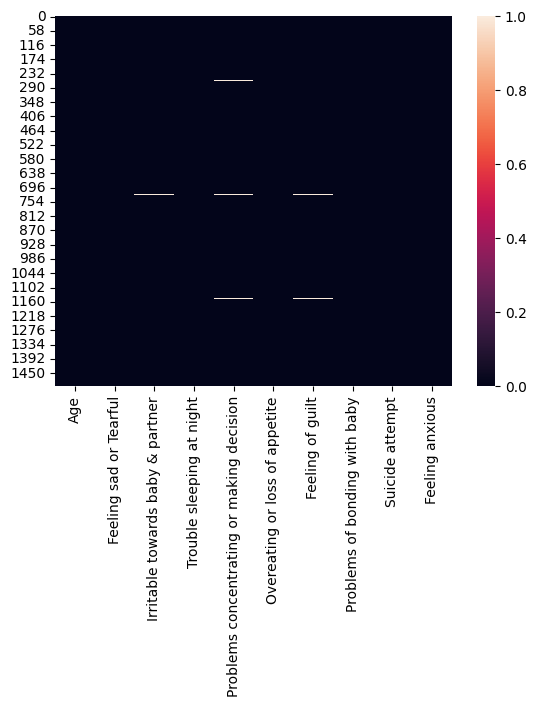

In [66]:
sns.heatmap(df.isnull())

In [67]:
df.value_counts()

Age    Feeling sad or Tearful  Irritable towards baby & partner  Trouble sleeping at night  Problems concentrating or making decision  Overeating or loss of appetite  Feeling of guilt  Problems of bonding with baby  Suicide attempt        Feeling anxious
40-45  Sometimes               Sometimes                         Two or more days a week    No                                         No                              Maybe             No                             No                     No                 33
       No                      Yes                               Two or more days a week    Yes                                        No                              No                Yes                            Yes                    Yes                30
30-35  Sometimes               Yes                               No                         Often                                      Not at all                      No                Sometimes                      No     

In [68]:
# Display missing values
print("Missing Values Before Filling:")
print(df.isnull().sum())


Missing Values Before Filling:
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
Feeling anxious                               0
dtype: int64


In [69]:
df.nunique()

Age                                          5
Feeling sad or Tearful                       3
Irritable towards baby & partner             3
Trouble sleeping at night                    3
Problems concentrating or making decision    3
Overeating or loss of appetite               3
Feeling of guilt                             3
Problems of bonding with baby                3
Suicide attempt                              3
Feeling anxious                              2
dtype: int64

In [70]:
"""
Fill null values in the DataFrame using appropriate methods.
"""
# Fill null values in numerical columns with mean
#numerical_columns = df.select_dtypes(include=np.number).columns
#df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill null values in categorical columns with mode
categorical_columns = df.select_dtypes(exclude=np.number).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [71]:
# Display missing values after filling
print("\nMissing Values After Filling:")
print(df.isnull().sum())


Missing Values After Filling:
Age                                          0
Feeling sad or Tearful                       0
Irritable towards baby & partner             0
Trouble sleeping at night                    0
Problems concentrating or making decision    0
Overeating or loss of appetite               0
Feeling of guilt                             0
Problems of bonding with baby                0
Suicide attempt                              0
Feeling anxious                              0
dtype: int64


<ipython-input-72-ea4c0c47f735>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y=col, hue='Feeling anxious', data=df, ci=None, ax=axes[i], palette=custom_palette)
<ipython-input-72-ea4c0c47f735>:21: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(x='Age', y=col, hue='Feeling anxious', data=df, ci=None, ax=axes[i], palette=custom_palette)
<ipython-input-72-ea4c0c47f735>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y=col, hue='Feeling anxious', data=df, ci=None, ax=axes[i], palette=custom_palette)
<ipython-input-72-ea4c0c47f735>:21: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(x='Age', y=col, hue='Feeling anxious', data=df, ci=None, ax=axes[i], palette=custom_palette)
<ipython-input-72-ea4c0c47f735>:21: FutureWarning: 

T

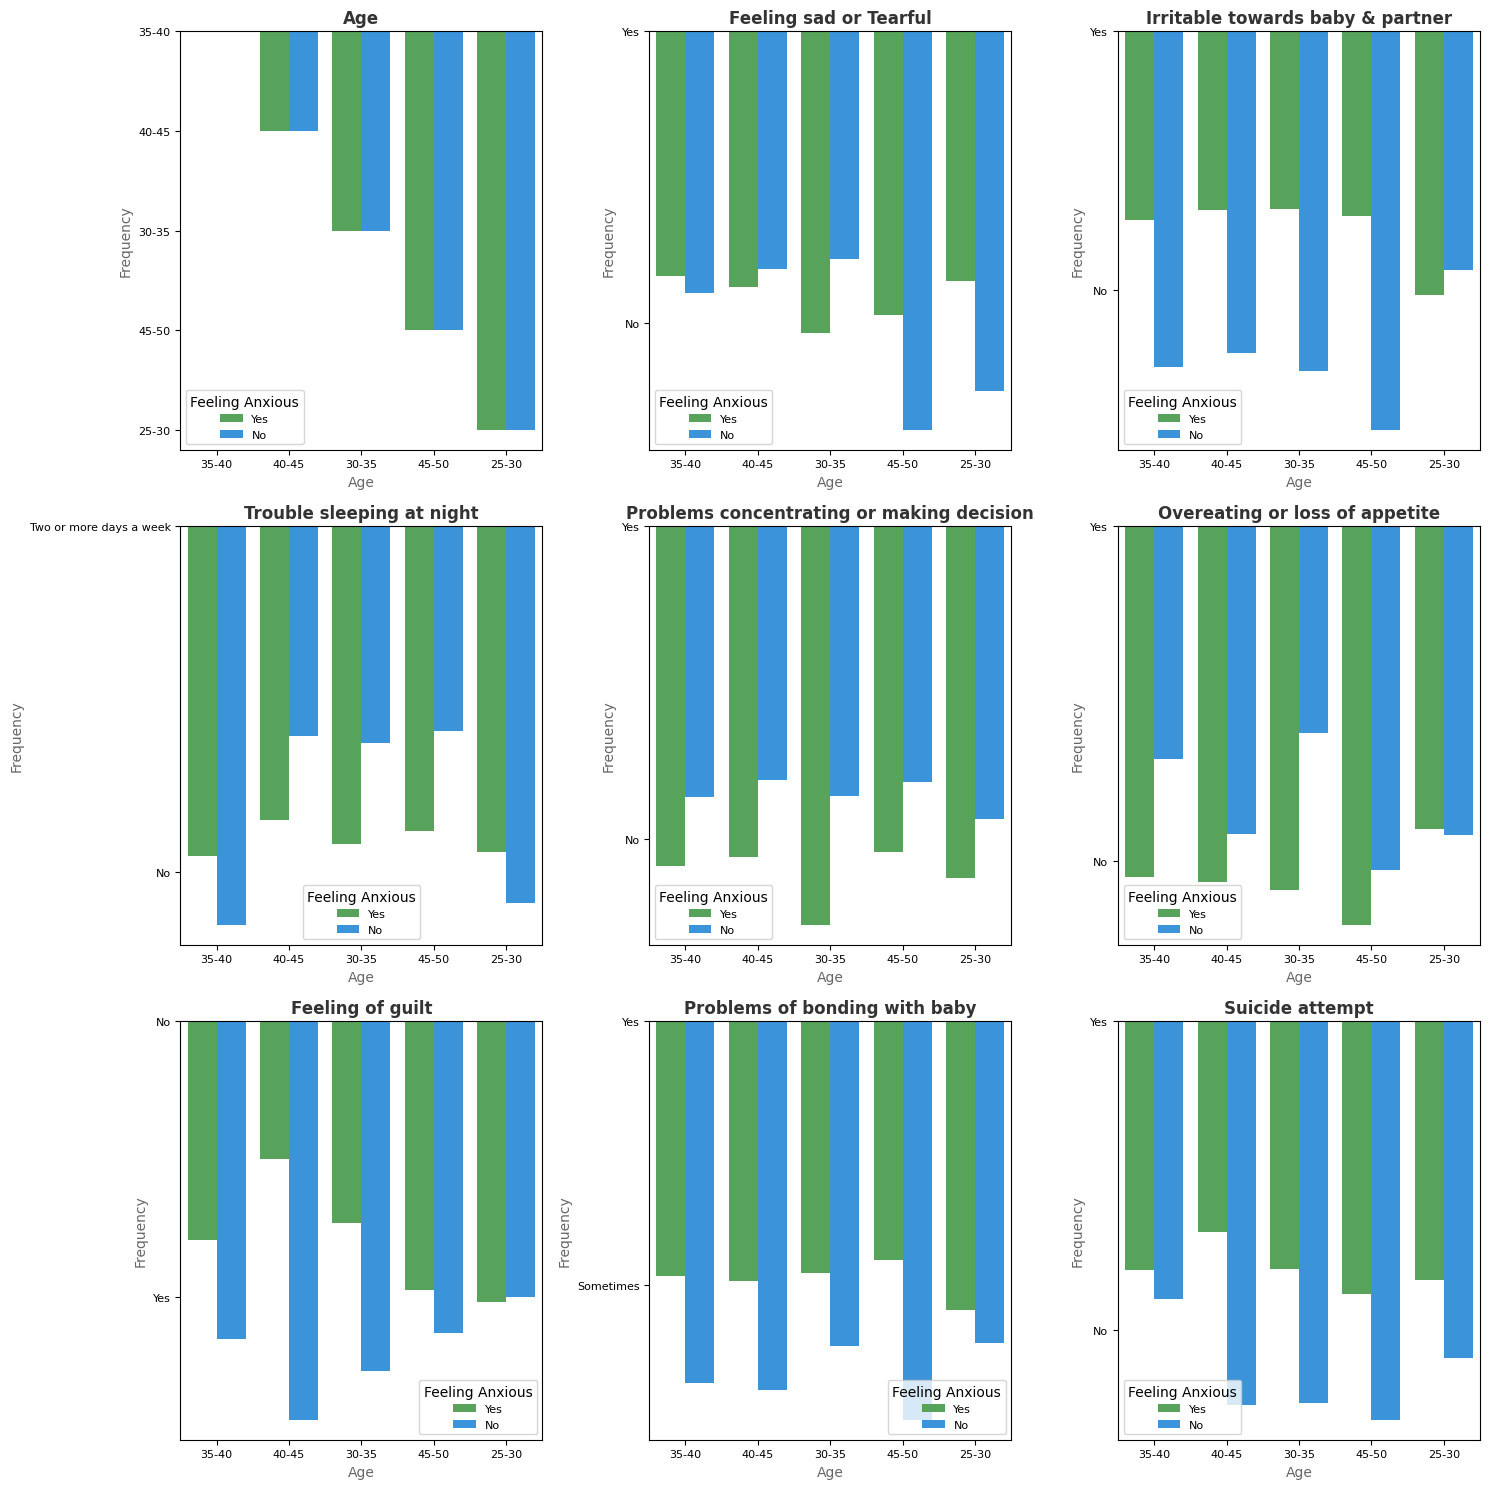

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that 'df' is your DataFrame and 'Feeling_anxious' is the common y-value
x_columns = ['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner',
             'Trouble sleeping at night', 'Problems concentrating or making decision',
             'Overeating or loss of appetite', 'Feeling of guilt',
             'Problems of bonding with baby', 'Suicide attempt']

# Define a custom color palette
custom_palette = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0', '#FFC107', '#E91E63', '#795548', '#00BCD4', '#FF5722']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each x-column and plot
for i, col in enumerate(x_columns):
    sns.barplot(x='Age', y=col, hue='Feeling anxious', data=df, ci=None, ax=axes[i], palette=custom_palette)
    axes[i].set_title(col, fontsize=12, fontweight='bold', color='#333333')  # Custom title formatting
    axes[i].set_xlabel('Age', fontsize=10, color='#666666')  # Custom x-axis label formatting
    axes[i].set_ylabel('Frequency', fontsize=10, color='#666666')  # Custom y-axis label formatting
    axes[i].tick_params(axis='both', which='major', labelsize=8)  # Custom tick label size
    axes[i].legend(title='Feeling Anxious', title_fontsize='10', fontsize='8')  # Custom legend formatting

# Adjust layout
plt.tight_layout()
plt.show()


In [73]:
import pandas as pd

# Assuming your data is stored in a DataFrame called df
# And columns_to_encode is a list containing the names of the columns you want to one-hot encode
columns_to_encode = ['Age', 'Feeling sad or Tearful', 'Irritable towards baby & partner', 'Trouble sleeping at night', 'Problems concentrating or making decision', 'Overeating or loss of appetite', 'Feeling of guilt', 'Problems of bonding with baby', 'Suicide attempt', 'Feeling anxious']

# Perform one-hot encoding
encoded_df = pd.get_dummies(df, columns=columns_to_encode)

# Display the encoded DataFrame
print(encoded_df.head())
encoded_df.shape


   Age_25-30  Age_30-35  Age_35-40  Age_40-45  Age_45-50  \
0      False      False       True      False      False   
1      False      False      False       True      False   
2      False      False       True      False      False   
3      False      False       True      False      False   
4      False      False      False       True      False   

   Feeling sad or Tearful_No  Feeling sad or Tearful_Sometimes  \
0                      False                             False   
1                      False                             False   
2                      False                             False   
3                      False                             False   
4                      False                             False   

   Feeling sad or Tearful_Yes  Irritable towards baby & partner_No  \
0                        True                                False   
1                        True                                 True   
2                        True   

(1503, 31)

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc

In [75]:
from sklearn.model_selection import train_test_split

# Assuming your data is stored in a DataFrame called df
X = encoded_df.drop(columns=['Feeling anxious_No','Feeling anxious_Yes']) # Features
y = encoded_df['Feeling anxious_Yes']  # Target variable

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("Validation set:", X_val.shape, y_val.shape)


Training set: (961, 29) (961,)
Testing set: (301, 29) (301,)
Validation set: (241, 29) (241,)


In [76]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## SUPPORT VECTOR MACHINE (SVM):


---




Support Vector Machine (SVM) Metrics:
Accuracy: 0.9336099585062241
Precision: 0.9627329192546584
Recall: 0.9393939393939394
F1 Score: 0.9509202453987731
ROC AUC: 0.9302232854864434


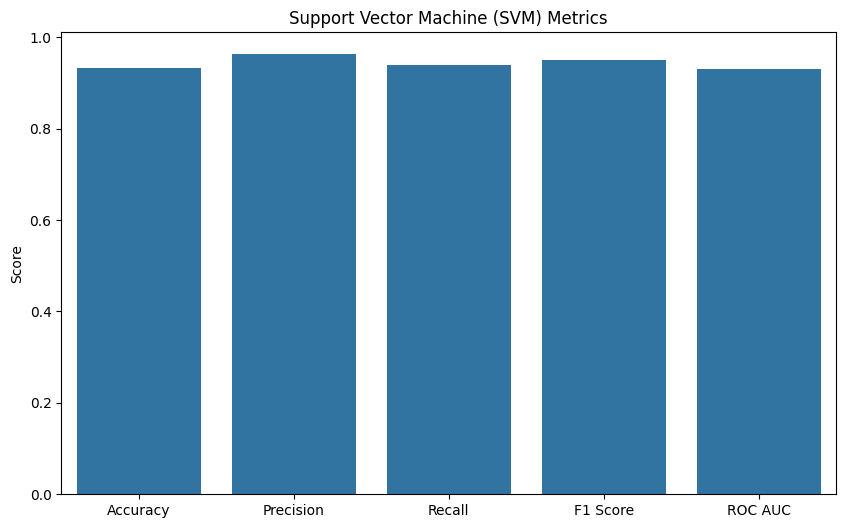

In [77]:
# Model development and evaluation
# Support Vector Machine (SVM)

model = svm_model = SVC()

# Training the model

svm_model.fit(X_train, y_train)

# Prediction on the testing set

svm_y_pred = svm_model.predict(X_val)

# Calculate the accuracy

svm_accuracy = accuracy_score(y_val, svm_y_pred)
svm_precision = precision_score(y_val, svm_y_pred)
svm_recall = recall_score(y_val, svm_y_pred)
svm_f1 = f1_score(y_val, svm_y_pred)
svm_roc_auc = roc_auc_score(y_val, svm_y_pred)

print("\nSupport Vector Machine (SVM) Metrics:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")
print(f"ROC AUC: {svm_roc_auc}")


# Plot SVM Metrics
svm_metrics = {'Accuracy': svm_accuracy, 'Precision': svm_precision, 'Recall': svm_recall, 'F1 Score': svm_f1, 'ROC AUC': svm_roc_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(svm_metrics.keys()), y=list(svm_metrics.values()))
plt.title('Support Vector Machine (SVM) Metrics')
plt.ylabel('Score')
plt.show()










/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


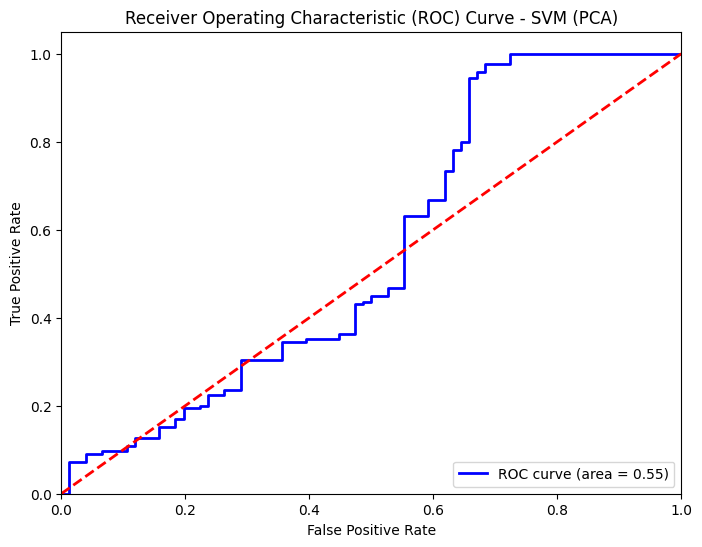

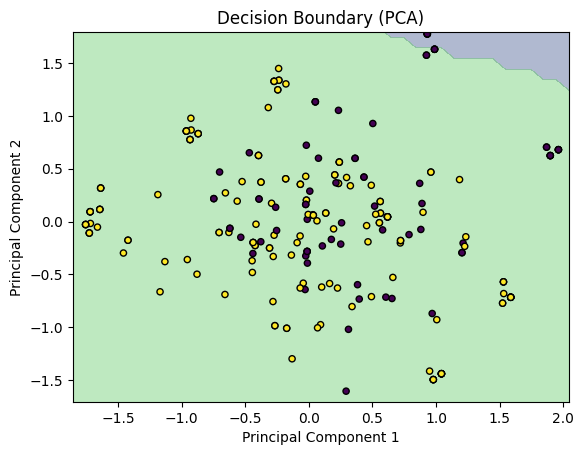

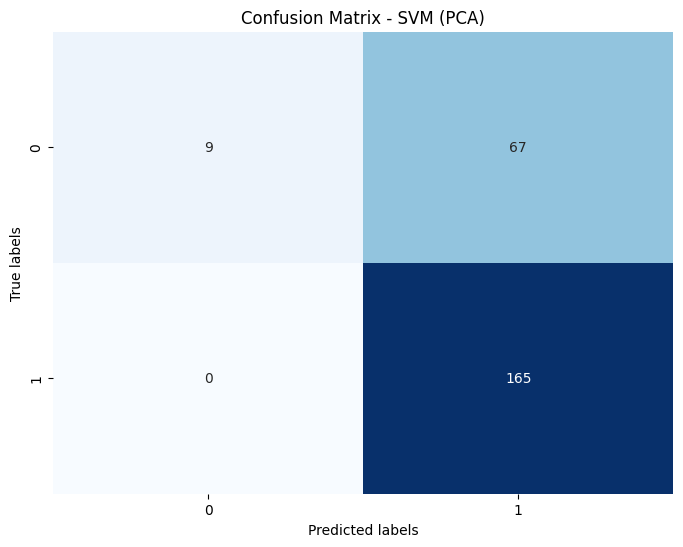

In [78]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA on training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val)

# Train the SVM model on the reduced-dimensional data
svm_model_pca = SVC()
svm_model_pca.fit(X_train_pca, y_train)

# 1. Plot ROC curve manually
svm_y_pred_proba_pca = svm_model_pca.decision_function(X_val_pca)
svm_roc_auc_pca = roc_auc_score(y_val, svm_y_pred_proba_pca)
fpr, tpr, thresholds = roc_curve(y_val, svm_y_pred_proba_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % svm_roc_auc_pca)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM (PCA)')
plt.legend(loc='lower right')
plt.show()

# 2. Plot decision boundary using PCA components
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title('Decision Boundary (PCA)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Plot decision boundary using PCA components
plot_decision_boundary(svm_model_pca, X_val_pca, y_val)

# 3. Plot confusion matrix heatmap
svm_y_pred_pca = svm_model_pca.predict(X_val_pca)
svm_conf_matrix_pca = confusion_matrix(y_val, svm_y_pred_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix_pca, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVM (PCA)')
plt.show()






Stratified K-Fold Cross Validation Scores: [0.93264249 0.86979167 0.921875   0.93229167 0.94791667]
Mean Accuracy: 0.9209034974093264
Repeated K-Fold Cross Validation Scores: [0.9015544  0.97916667 0.921875   0.89583333 0.92708333 0.90673575
 0.921875   0.94270833 0.91666667 0.921875  ]
Mean Accuracy: 0.9235373488773748
Time Series Cross Validation Scores: [0.8625  0.84375 0.9375  0.91875 0.95   ]
Mean Accuracy: 0.9025000000000001


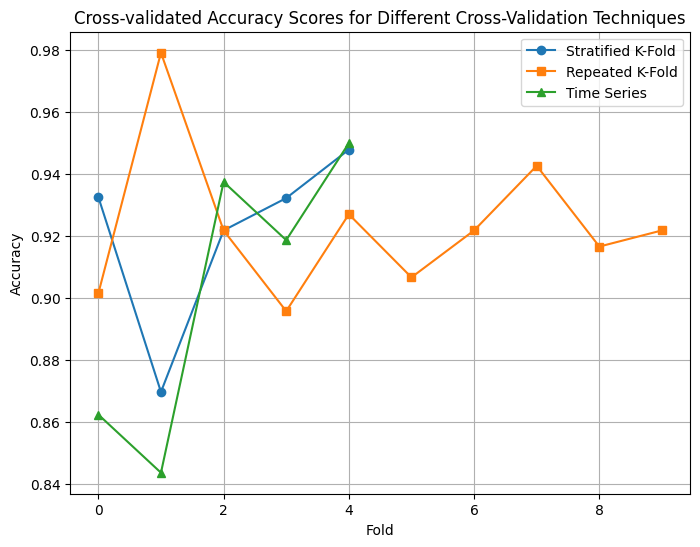

In [79]:
from sklearn.model_selection import StratifiedKFold, RepeatedKFold, TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5)

# Perform Stratified K-Fold Cross Validation
svm_cv_scores_skf = cross_val_score(svm_model, X_train, y_train, cv=skf)

# Print the cross-validation scores
print("Stratified K-Fold Cross Validation Scores:", svm_cv_scores_skf)
print("Mean Accuracy:", svm_cv_scores_skf.mean())

# Define Repeated K-Fold Cross-Validation
rkf = RepeatedKFold(n_splits=5, n_repeats=2)

# Perform Repeated K-Fold Cross Validation
svm_cv_scores_rkf = cross_val_score(svm_model, X_train, y_train, cv=rkf)

# Print the cross-validation scores
print("Repeated K-Fold Cross Validation Scores:", svm_cv_scores_rkf)
print("Mean Accuracy:", svm_cv_scores_rkf.mean())

# Define Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Perform Time Series Cross Validation
svm_cv_scores_tscv = cross_val_score(svm_model, X_train, y_train, cv=tscv)

# Print the cross-validation scores
print("Time Series Cross Validation Scores:", svm_cv_scores_tscv)
print("Mean Accuracy:", svm_cv_scores_tscv.mean())

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(svm_cv_scores_skf, label='Stratified K-Fold', marker='o')
plt.plot(svm_cv_scores_rkf, label='Repeated K-Fold', marker='s')
plt.plot(svm_cv_scores_tscv, label='Time Series', marker='^')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validated Accuracy Scores for Different Cross-Validation Techniques')
plt.legend()
plt.grid(True)
plt.show()


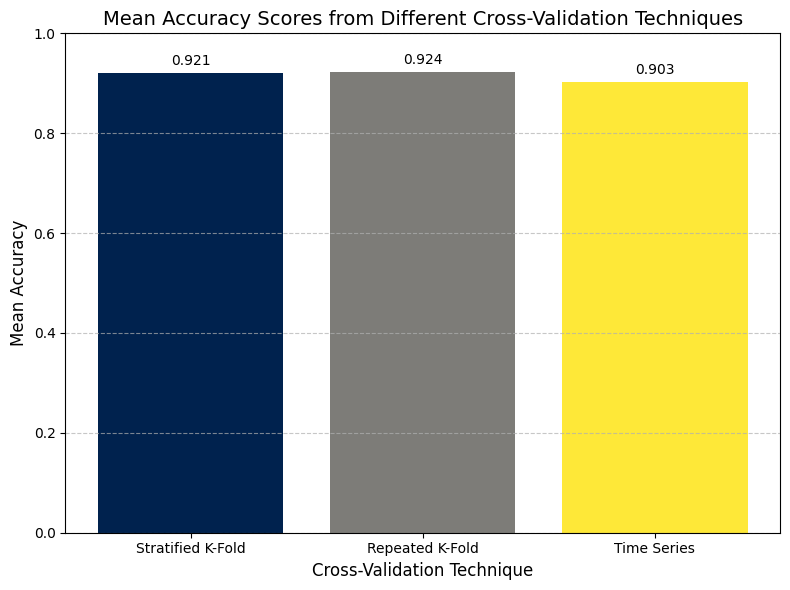

In [80]:
import matplotlib.pyplot as plt
import numpy as np

# Mean accuracy scores obtained from different cross-validation techniques
mean_accuracies = [
    0.9209034974093264,  # Mean accuracy from Stratified K-Fold Cross Validation
    0.9235292530224525,  # Mean accuracy from Repeated K-Fold Cross Validation
    0.9025000000000001   # Mean accuracy from Time Series Cross Validation
]

# Cross-validation technique names
cv_techniques = ['Stratified K-Fold', 'Repeated K-Fold', 'Time Series']

# Create a custom colormap
colors = plt.cm.cividis(np.linspace(0, 1, len(mean_accuracies)))

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(cv_techniques, mean_accuracies, color=colors)
plt.xlabel('Cross-Validation Technique', fontsize=12)
plt.ylabel('Mean Accuracy', fontsize=12)
plt.title('Mean Accuracy Scores from Different Cross-Validation Techniques', fontsize=14)
plt.ylim([0, 1])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for bar, accuracy in zip(bars, mean_accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{accuracy:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig('cross_validation_mean_accuracy_bar.png')  # Save the plot as an image file
plt.show()


## RANDOM FOREST:


Random Forest Metrics:
Accuracy: 0.975103734439834
Precision: 0.9877300613496932
Recall: 0.9757575757575757
F1 Score: 0.9817073170731707
ROC AUC: 0.9747208931419458


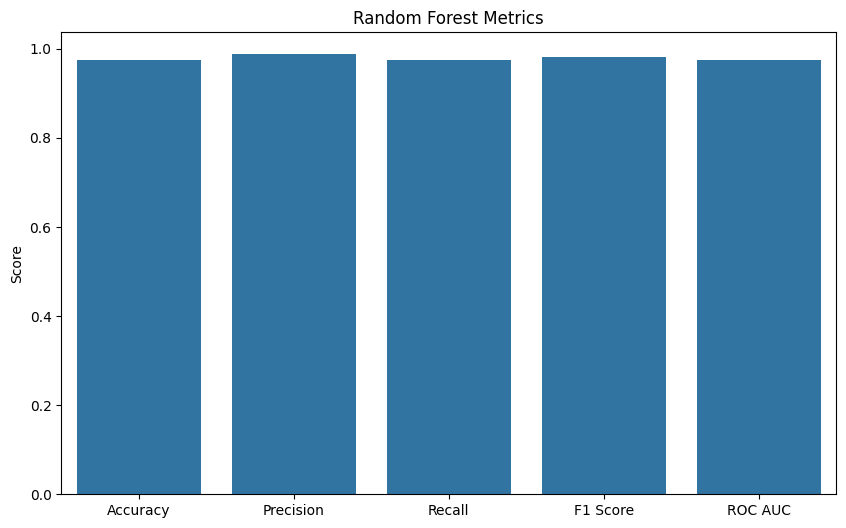

In [81]:
# Model development and evaluation
# Random Forest


model = rf_model = RandomForestClassifier()

# Training the model
rf_model.fit(X_train_scaled, y_train)

# Prediction on the testing set
rf_y_pred = rf_model.predict(X_val_scaled)

# Calculate the accuracy
rf_accuracy = accuracy_score(y_val, rf_y_pred)
rf_precision = precision_score(y_val, rf_y_pred)
rf_recall = recall_score(y_val, rf_y_pred)
rf_f1 = f1_score(y_val, rf_y_pred)
rf_roc_auc = roc_auc_score(y_val, rf_y_pred)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"ROC AUC: {rf_roc_auc}")

# Plot Random Forest Metrics
rf_metrics = {'Accuracy': rf_accuracy, 'Precision': rf_precision, 'Recall': rf_recall, 'F1 Score': rf_f1, 'ROC AUC': rf_roc_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(rf_metrics.keys()), y=list(rf_metrics.values()))
plt.title('Random Forest Metrics')
plt.ylabel('Score')
plt.show()







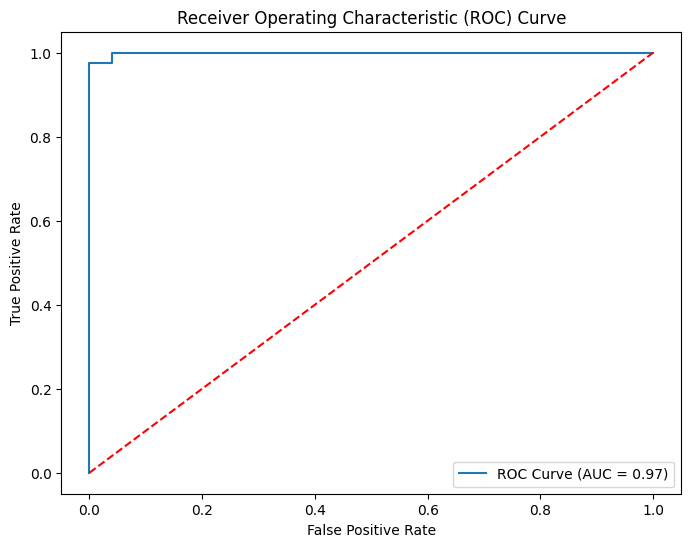

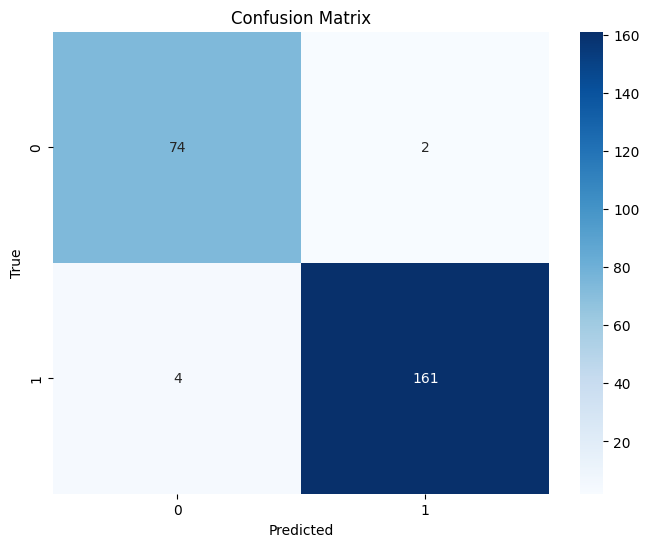

In [82]:
# Plot ROC Curve
rf_y_pred_proba = rf_model.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, rf_y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, model.predict(X_val_scaled))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()




Random Forest - Cross-validated Accuracy Scores: [0.96373057 0.94270833 0.96875    0.96354167 0.97916667]
Random Forest - Mean Cross-validated Accuracy: 0.9635794473229706


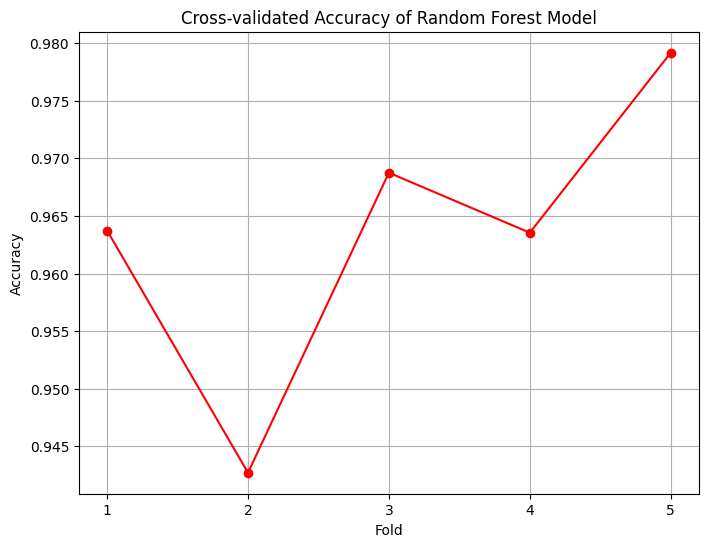

In [83]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_model = RandomForestClassifier()

# Perform 5-fold cross-validation
cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)

# Calculate mean accuracy
mean_cv_accuracy_rf = np.mean(cv_scores_rf)

print("Random Forest - Cross-validated Accuracy Scores:", cv_scores_rf)
print("Random Forest - Mean Cross-validated Accuracy:", mean_cv_accuracy_rf)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), cv_scores_rf, marker='o', linestyle='-', color='red')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validated Accuracy of Random Forest Model')
plt.xticks(np.arange(1, 6))
plt.grid(True)
plt.show()


## Logistic Regression:


Logistic Regression Metrics:
Accuracy: 0.8506224066390041
Mean Accuracy (cross-validation): 0.8106271588946459
Precision: 0.9006211180124224
Recall: 0.8787878787878788
F1 Score: 0.8895705521472393
ROC AUC: 0.8341307814992026


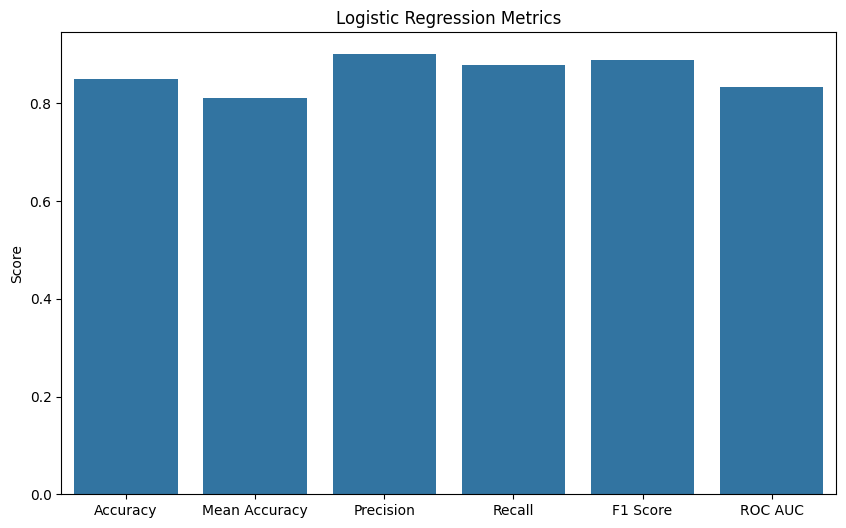

In [84]:
# Model development and evaluation
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a logistic regression model
model = logistic_model = LogisticRegression()

# Training the model
logistic_model.fit(X_train_scaled, y_train)

# Prediction on the testing set
logistic_y_pred = logistic_model.predict(X_val_scaled)

# Calculate the accuracy
logistic_accuracy = accuracy_score(y_val, logistic_y_pred)
logistic_precision = precision_score(y_val, logistic_y_pred)
logistic_recall = recall_score(y_val, logistic_y_pred)
logistic_f1 = f1_score(y_val, logistic_y_pred)
logistic_roc_auc = roc_auc_score(y_val, logistic_y_pred)

# Calculate Mean Accuracy using cross-validation
mean_accuracy = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()

print("\nLogistic Regression Metrics:")
print(f"Accuracy: {logistic_accuracy}")
print(f"Mean Accuracy (cross-validation): {mean_accuracy}")
print(f"Precision: {logistic_precision}")
print(f"Recall: {logistic_recall}")
print(f"F1 Score: {logistic_f1}")
print(f"ROC AUC: {logistic_roc_auc}")

# Plot Logistic Regression Metrics
logistic_metrics = {'Accuracy': logistic_accuracy, 'Mean Accuracy': mean_accuracy, 'Precision': logistic_precision, 'Recall': logistic_recall, 'F1 Score': logistic_f1, 'ROC AUC': logistic_roc_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(logistic_metrics.keys()), y=list(logistic_metrics.values()))
plt.title('Logistic Regression Metrics')
plt.ylabel('Score')
plt.show()


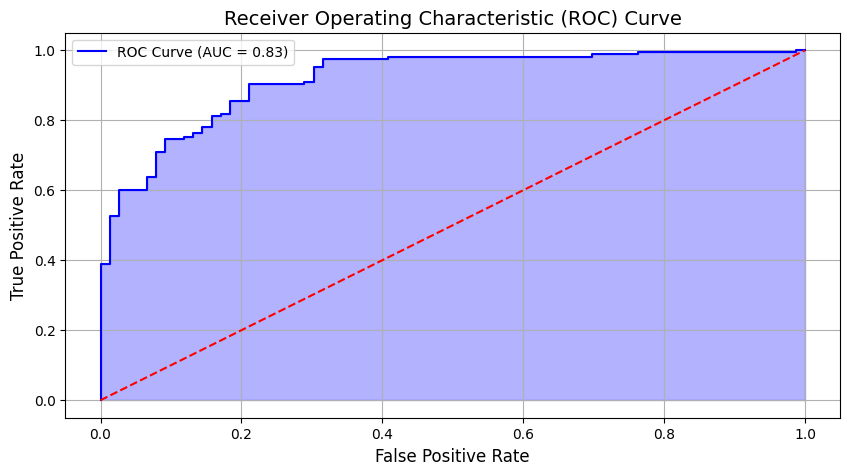

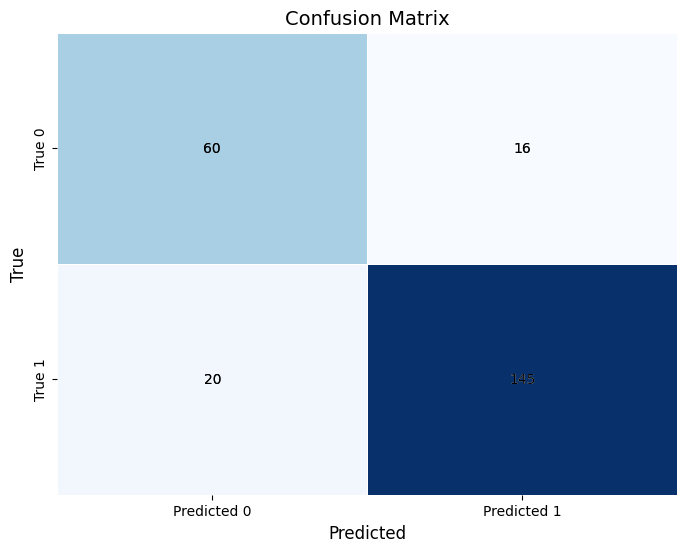

In [85]:
from sklearn.metrics import roc_curve, confusion_matrix

# Plot ROC Curve
logistic_y_pred_proba = logistic_model.predict_proba(X_val_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, logistic_y_pred_proba)
plt.figure(figsize=(10, 5))

# Plotting ROC Curve
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {logistic_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.fill_between(fpr, tpr, color='blue', alpha=0.3)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Custom Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_val, logistic_y_pred)
plt.figure(figsize=(8, 6))

# Creating a custom heatmap
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', linewidths=.5, cbar=False)

# Adding title and labels
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

# Customizing tick marks
tick_marks = np.arange(len(conf_matrix))
plt.xticks(tick_marks + 0.5, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks + 0.5, ['True 0', 'True 1'])

# Adding text annotations
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j + 0.5, i + 0.5, str(conf_matrix[i][j]), horizontalalignment='center', verticalalignment='center')

plt.show()


Logistic Regression - Cross-validated Accuracy Scores: [0.79792746 0.79166667 0.8125     0.84895833 0.80208333]
Logistic Regression - Mean Cross-validated Accuracy: 0.8106271588946459


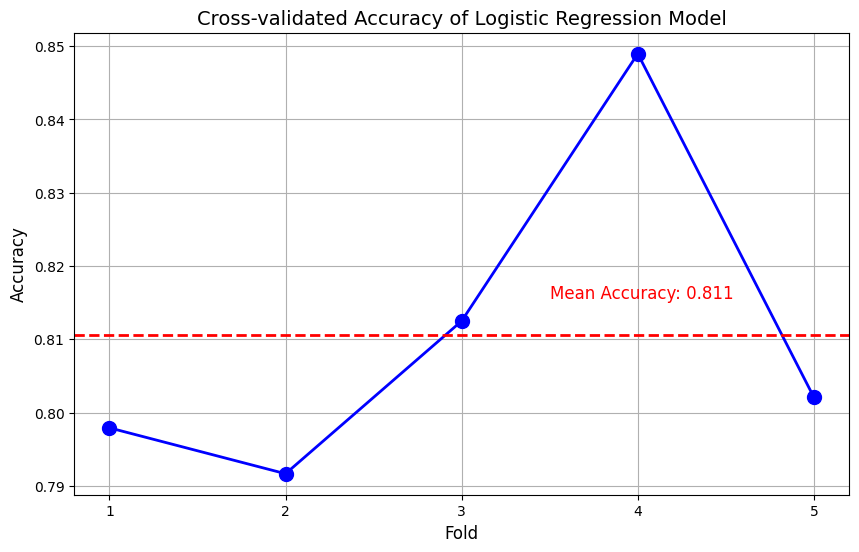

In [86]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
logistic_model = LogisticRegression()

# Perform 5-fold cross-validation
cv_scores_logistic = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5)

# Calculate mean accuracy
mean_cv_accuracy_logistic = np.mean(cv_scores_logistic)

print("Logistic Regression - Cross-validated Accuracy Scores:", cv_scores_logistic)
print("Logistic Regression - Mean Cross-validated Accuracy:", mean_cv_accuracy_logistic)

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the line graph
plt.plot(np.arange(1, 6), cv_scores_logistic, marker='o', linestyle='-', color='blue', markersize=10, linewidth=2)

# Adding a horizontal line for mean accuracy
plt.axhline(y=mean_cv_accuracy_logistic, color='red', linestyle='--', linewidth=2)

# Adding text annotation for mean accuracy
plt.text(3.5, mean_cv_accuracy_logistic + 0.005, f'Mean Accuracy: {mean_cv_accuracy_logistic:.3f}', color='red', fontsize=12)

# Adding labels and title
plt.xlabel('Fold', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Cross-validated Accuracy of Logistic Regression Model', fontsize=14)

# Customizing ticks
plt.xticks(np.arange(1, 6), fontsize=10)
plt.yticks(fontsize=10)

# Adding grid
plt.grid(True)

# Display the plot
plt.show()


## K-Nearest Neighbors (KNN):


K-Nearest Neighbors (KNN) Metrics:
Accuracy: 0.8796680497925311
Precision: 0.9146341463414634
Recall: 0.9090909090909091
F1 Score: 0.9118541033434651
ROC AUC: 0.8624401913875599


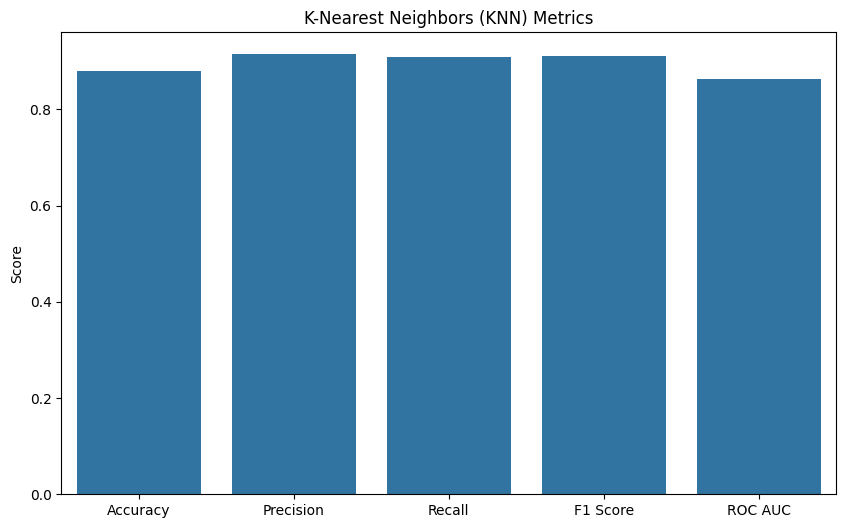

In [87]:
# Model development and evaluation
# K-Nearest Neighbors (KNN)
model = knn_model = KNeighborsClassifier()

# Training the model
knn_model.fit(X_train_scaled, y_train)

# Prediction on the testing set
knn_y_pred = knn_model.predict(X_val_scaled)

# Calculate the accuracy
knn_accuracy = accuracy_score(y_val, knn_y_pred)
knn_precision = precision_score(y_val, knn_y_pred)
knn_recall = recall_score(y_val, knn_y_pred)
knn_f1 = f1_score(y_val, knn_y_pred)
knn_roc_auc = roc_auc_score(y_val, knn_y_pred)

print("\nK-Nearest Neighbors (KNN) Metrics:")
print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")
print(f"ROC AUC: {knn_roc_auc}")

# Plot KNN Metrics
knn_metrics = {'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'F1 Score': knn_f1, 'ROC AUC': knn_roc_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(knn_metrics.keys()), y=list(knn_metrics.values()))
plt.title('K-Nearest Neighbors (KNN) Metrics')
plt.ylabel('Score')
plt.show()











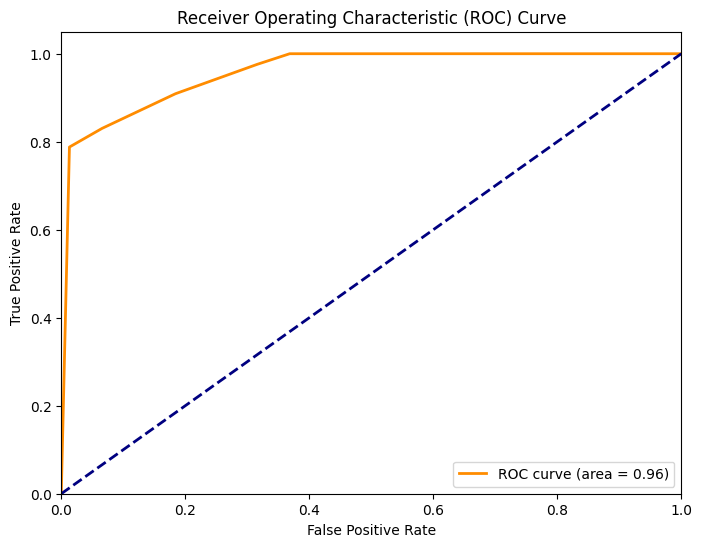

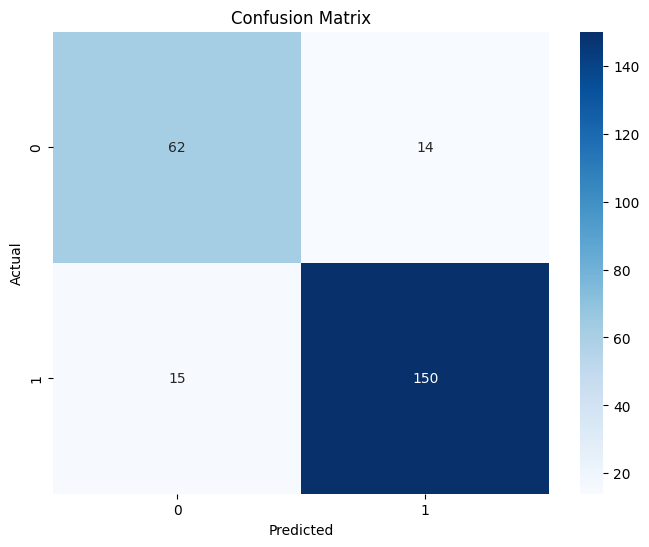

In [88]:
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val_scaled)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, model.predict(X_val_scaled))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


K-Nearest Neighbors (KNN) - Cross-validated Accuracy Scores: [0.84974093 0.83854167 0.859375   0.90104167 0.90625   ]
K-Nearest Neighbors (KNN) - Mean Cross-validated Accuracy: 0.8709898531951641


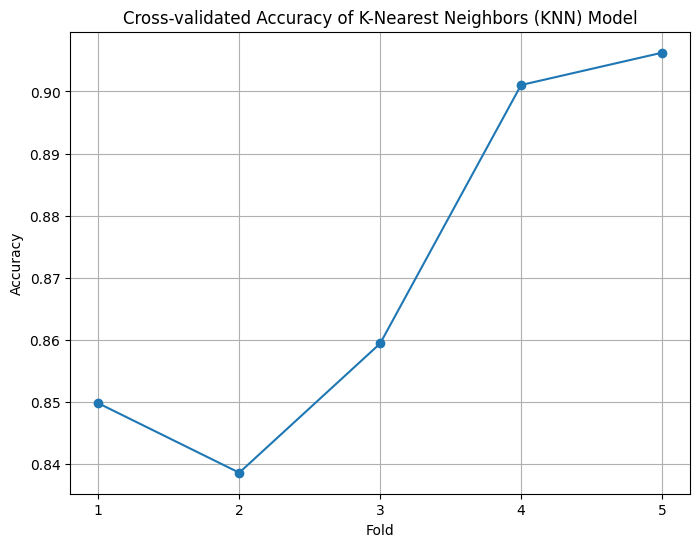

In [89]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Initialize K-Nearest Neighbors (KNN) classifier
knn_model = KNeighborsClassifier()

# Perform 5-fold cross-validation
cv_scores_knn = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)

# Calculate mean accuracy
mean_cv_accuracy_knn = np.mean(cv_scores_knn)

print("K-Nearest Neighbors (KNN) - Cross-validated Accuracy Scores:", cv_scores_knn)
print("K-Nearest Neighbors (KNN) - Mean Cross-validated Accuracy:", mean_cv_accuracy_knn)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), cv_scores_knn, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validated Accuracy of K-Nearest Neighbors (KNN) Model')
plt.xticks(np.arange(1, 6))
plt.grid(True)
plt.show()


## XGBoost:


XGBoost Metrics:
Accuracy: 0.966804979253112
Precision: 0.9757575757575757
Recall: 0.9757575757575757
F1 Score: 0.9757575757575757
ROC AUC: 0.9615629984051036


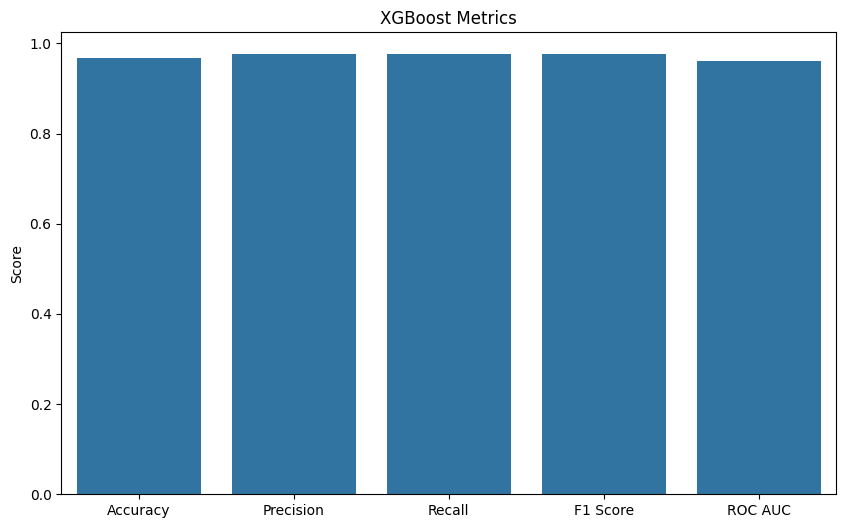

In [90]:
# Model development and evaluation
# XGBoost
model = xgb_model = XGBClassifier()

# Training the model
xgb_model.fit(X_train_scaled, y_train)

# Prediction on the testing set
xgb_y_pred = xgb_model.predict(X_val_scaled)

# Calculate the accuracy
xgb_accuracy = accuracy_score(y_val, xgb_y_pred)
xgb_precision = precision_score(y_val, xgb_y_pred)
xgb_recall = recall_score(y_val, xgb_y_pred)
xgb_f1 = f1_score(y_val, xgb_y_pred)
xgb_roc_auc = roc_auc_score(y_val, xgb_y_pred)

print("\nXGBoost Metrics:")
print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1 Score: {xgb_f1}")
print(f"ROC AUC: {xgb_roc_auc}")

# Plot XGBoost Metrics
xgb_metrics = {'Accuracy': xgb_accuracy, 'Precision': xgb_precision, 'Recall': xgb_recall, 'F1 Score': xgb_f1, 'ROC AUC': xgb_roc_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(xgb_metrics.keys()), y=list(xgb_metrics.values()))
plt.title('XGBoost Metrics')
plt.ylabel('Score')
plt.show()







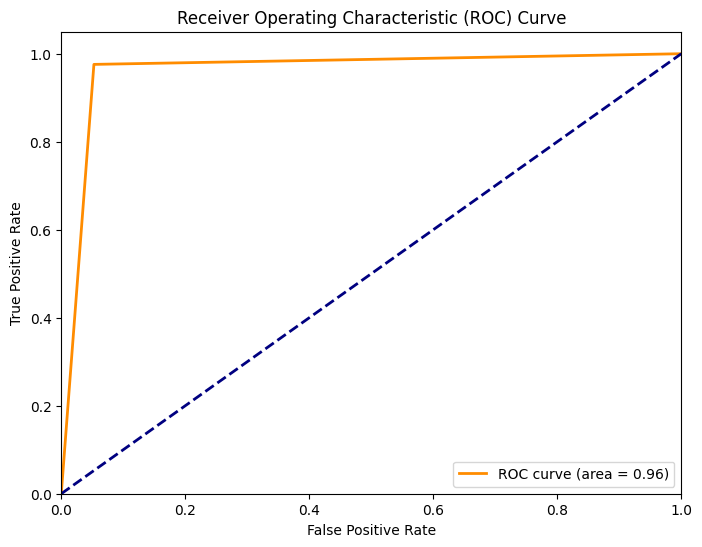

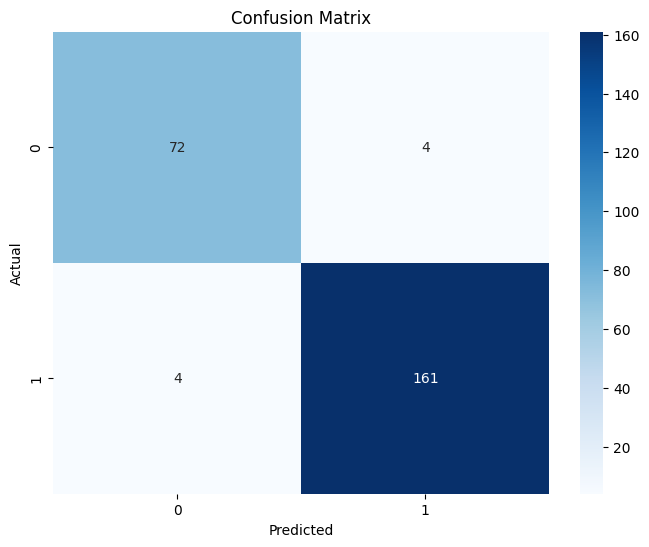

In [91]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, xgb_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, xgb_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


XGBoost - Cross-validated Accuracy Scores: [0.95854922 0.94270833 0.953125   0.96354167 0.96354167]
XGBoost - Mean Cross-validated Accuracy: 0.9562931778929189


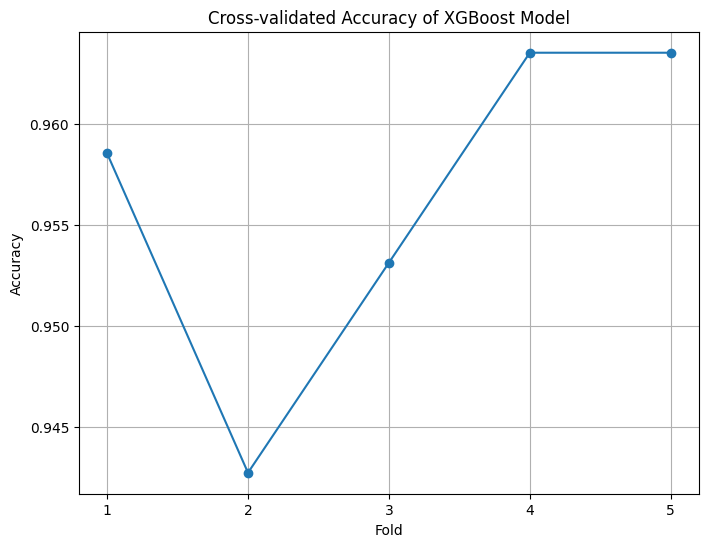

In [92]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Perform 5-fold cross-validation
cv_scores_xgb = cross_val_score(xgb_model, X_train_scaled, y_train, cv=5)

# Calculate mean accuracy
mean_cv_accuracy_xgb = np.mean(cv_scores_xgb)

print("XGBoost - Cross-validated Accuracy Scores:", cv_scores_xgb)
print("XGBoost - Mean Cross-validated Accuracy:", mean_cv_accuracy_xgb)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), cv_scores_xgb, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validated Accuracy of XGBoost Model')
plt.xticks(np.arange(1, 6))
plt.grid(True)
plt.show()


## Neural Network:

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Neural Network Metrics:
Accuracy: 0.9626556016597511
Precision: 0.9698795180722891
Recall: 0.9757575757575757
F1 Score: 0.9728096676737159
ROC AUC: 0.9549840510366826


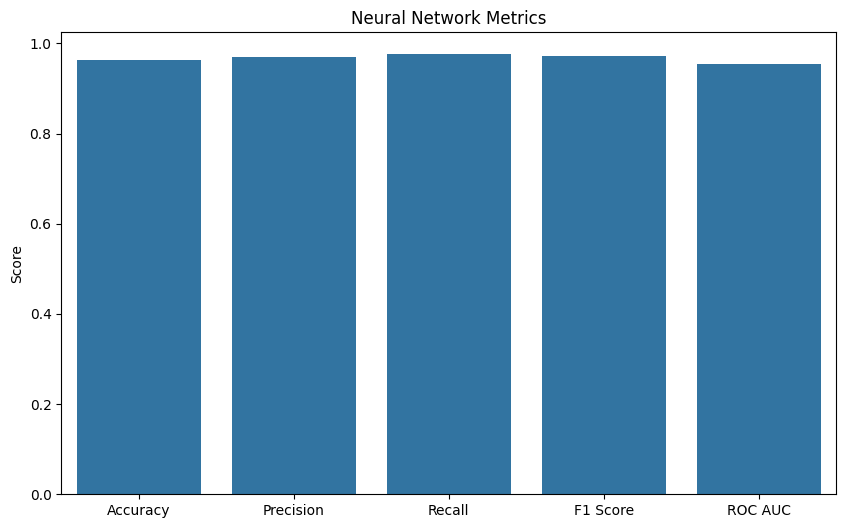

In [93]:
# Model development and evaluation
# Neural Network
model = nn_model = MLPClassifier()

# Training the model
nn_model.fit(X_train_scaled, y_train)

# Prediction on the testing set
nn_y_pred = nn_model.predict(X_val_scaled)

# Calculate the accuracy
nn_accuracy = accuracy_score(y_val, nn_y_pred)
nn_precision = precision_score(y_val, nn_y_pred)
nn_recall = recall_score(y_val, nn_y_pred)
nn_f1 = f1_score(y_val, nn_y_pred)
nn_roc_auc = roc_auc_score(y_val, nn_y_pred)

print("\nNeural Network Metrics:")
print(f"Accuracy: {nn_accuracy}")
print(f"Precision: {nn_precision}")
print(f"Recall: {nn_recall}")
print(f"F1 Score: {nn_f1}")
print(f"ROC AUC: {nn_roc_auc}")

# Plot Neural Network Metrics
nn_metrics = {'Accuracy': nn_accuracy, 'Precision': nn_precision, 'Recall': nn_recall, 'F1 Score': nn_f1, 'ROC AUC': nn_roc_auc}
plt.figure(figsize=(10, 6))
sns.barplot(x=list(nn_metrics.keys()), y=list(nn_metrics.values()))
plt.title('Neural Network Metrics')
plt.ylabel('Score')
plt.show()






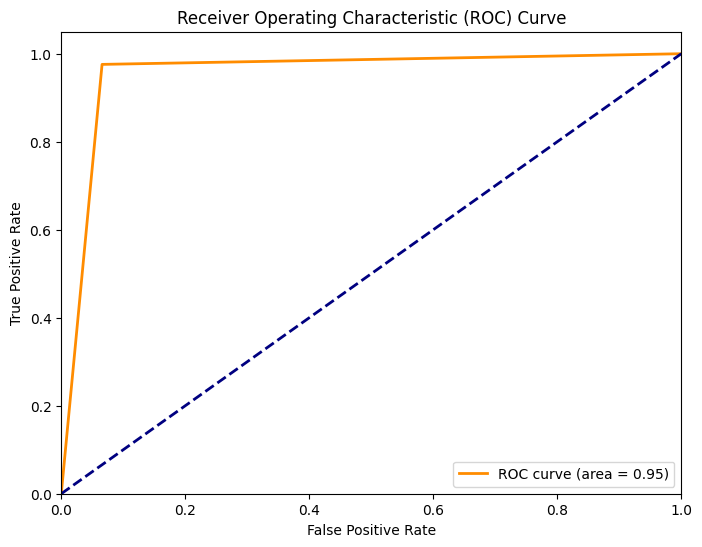

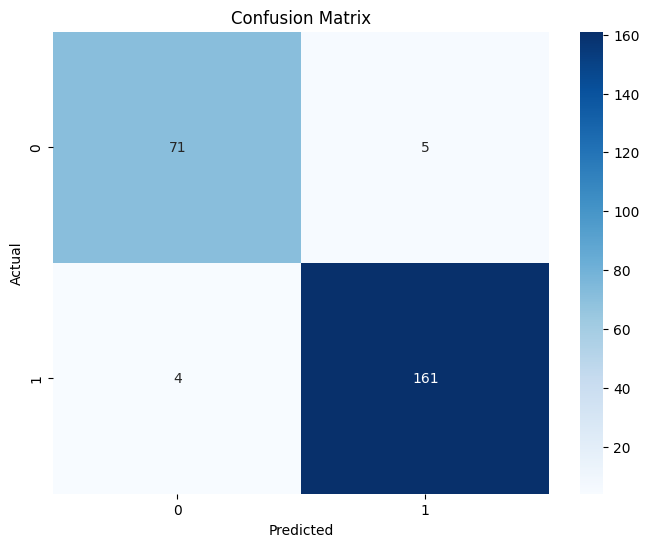

In [94]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, nn_y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, nn_y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Neural Network - Cross-validated Accuracy Scores: [0.96373057 0.9375     0.9375     0.96354167 0.97395833]
Neural Network - Mean Cross-validated Accuracy: 0.9552461139896373


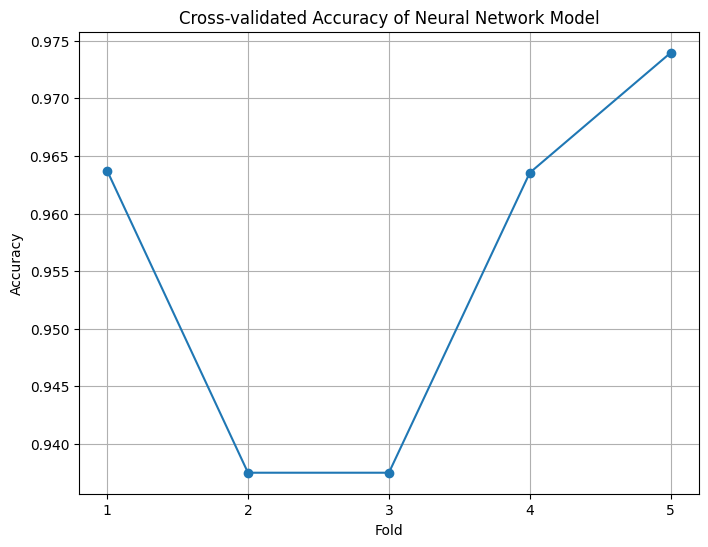

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

# Initialize Neural Network classifier
nn_model = MLPClassifier()

# Perform 5-fold cross-validation
cv_scores_nn = cross_val_score(nn_model, X_train_scaled, y_train, cv=5)

# Calculate mean accuracy
mean_cv_accuracy_nn = np.mean(cv_scores_nn)

print("Neural Network - Cross-validated Accuracy Scores:", cv_scores_nn)
print("Neural Network - Mean Cross-validated Accuracy:", mean_cv_accuracy_nn)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 6), cv_scores_nn, marker='o', linestyle='-')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-validated Accuracy of Neural Network Model')
plt.xticks(np.arange(1, 6))
plt.grid(True)
plt.show()
